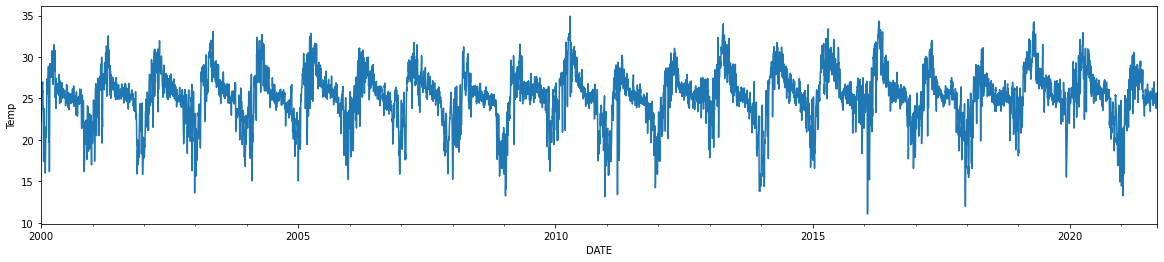

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
pd.options.display.width=300
np.set_printoptions(linewidth=500, precision=2)

data = pd.read_csv('data/data.csv')[['DATE', 'T2M']]
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
data.set_index('DATE', inplace=True)

data.plot(figsize=(20,4), ylabel='Temp', legend=False)

# Train, test split
test_ratio = 0.2
train_idx = int(len(data) * (1. - test_ratio))
train = data.loc[data.index[:train_idx]]
test = data.loc[data.index[train_idx:]]

In [29]:
def build_dataset(data):
    X, Y = [], []
    for i in range(len(data)):
        ts = data.index[i]
        x = np.array([
            ts.dayofyear,
            ts.day,
            ts.dayofweek,
            ts.year - data.index[0].year
        ])
        y = data['T2M'][i]
        X.append(x.astype(int))
        Y.append(y)

    X = np.vstack(X).astype(int)
    Y = np.vstack(Y)
    dataset = np.hstack([X,Y])
    dataset = pd.DataFrame(
        data=dataset,
        columns=['dayofyear', 'dayofmonth', 'dayofweek', 'year_from_2000', 't2m']
    )
    return dataset

train_set = build_dataset(train)
test_set = build_dataset(test)

In [32]:
train_set
X = train_set
X['dayofyear'] = X['dayofyear'].astype(int)
np.savetxt('rf_data.csv', train_set, delimiter=',')

Text(0, 0.5, 'Actual')

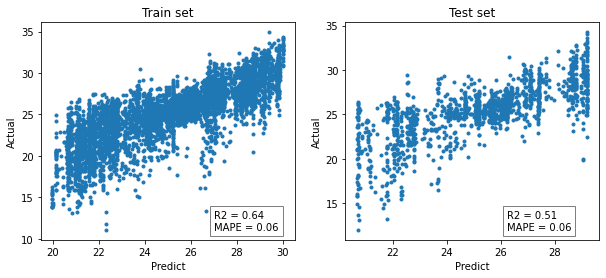

In [3]:
train_x, train_y = train_set.values[:,:-1], train_set.values[:,-1]
test_x, test_y = test_set.values[:,:-1], test_set.values[:,-1]
# model = RandomForestRegressor(n_estimators=50, min_samples_split=50, criterion='squared_error', random_state=42)
# model = RandomForestRegressor(n_estimators=50, min_samples_split=80, criterion='squared_error', random_state=42)
model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=200, criterion='squared_error', random_state=42)
model.fit(train_x, train_y)

train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
train_r2, train_mape = r2_score(train_y, train_predict), mean_absolute_percentage_error(train_y, train_predict)
test_r2, test_mape = r2_score(test_y, test_predict), mean_absolute_percentage_error(test_y, test_predict)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Train set')
plt.scatter(train_predict, train_y, marker='.')
plt.text(train_predict.max() - 3., train_y.min(), 'R2 = {:.2f}\nMAPE = {:.2f}'.format(train_r2, train_mape), bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.subplot(122)
plt.title('Test set')
plt.scatter(test_predict, test_y, marker='.')
plt.text(test_predict.max() - 3., test_y.min(), 'R2 = {:.2f}\nMAPE = {:.2f}'.format(test_r2, test_mape), bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Predict')
plt.ylabel('Actual')

1.5271780662940877


(0.0, 1585.0)

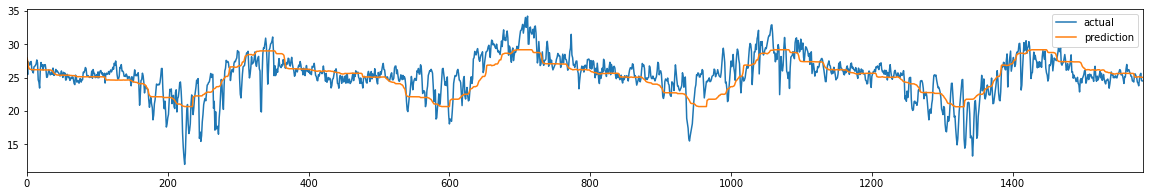

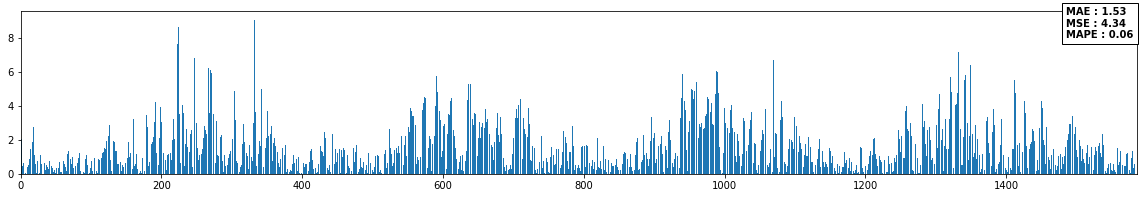

In [16]:
# Make prediction
dataset = build_dataset(test)
prediction = model.predict(dataset.values[:,:-1])
residual = np.abs(dataset.values[:,-1] - prediction)
sqr_err = residual ** 2
percent_err = residual / dataset.values[:,-1]
mape = percent_err.mean()
mse = sqr_err.mean()
mae = residual.mean()
print(mae)

plt.figure(figsize=(20,3))
plt.plot(dataset.values[:,-1], label='actual')
plt.plot(prediction, label='prediction')
plt.xlim((0, len(dataset)))
# plt.title('Forecasting Result')
plt.legend()

plt.figure(figsize=(20,3))
plt.bar(range(len(dataset)), residual)
plt.text(len(dataset) - 100, 8, 'MAE : %.2f\nMSE : %.2f\nMAPE : %.2f' % (mae, mse, mape), bbox=dict(facecolor='white'), fontweight='bold')
plt.xlim((0, len(dataset)))
# plt.title('Daily Forecasting Errors')

In [15]:
residual.mean()

1.5271780662940877